# Aulas 12 e 13

Nestas aulas vamos falar de integração numérica aplicada ao problema do movimento do pêndulo. Esta aula é baseada no exercício disponível no site: https://nbviewer.org/urls/www.numfys.net/media/notebooks/simple_pendulum.ipynb

## O movimento de pêndulo

Suponha um pêndulo como mostrado na figura abaixo

![Movimendo do pêndulo](figuras/pendulum.png)

Para resolver esse problema utilizaremos a segunda Lei de Newton para rotações.

\begin{equation}
\tau = I\alpha
\tag{1}
\end{equation}
onde $\tau$ é o torque gerado pela componente da gravidade na direção do movimento, $I$ é o momento de inércia e $\alpha$ é a aceleração da gravidade.

A força na direção do movimento pode ser determinada utilizando o ângulo $theta$ com a vertical. $F_{\theta} = -mg\sin(\theta)$.

Logo, o torque será a força na direção do movimento multiplicada pela distância ao eixo de rotação: $\tau = -mgL\sin(\theta)$.

O momento de inércia é dada pela equação: $I = \sum_i m_ir_i^2$ onde $r_i$ é a distância ao eixo de rotação. Logo: $I = mL^2$.

A aceleração angular, por definição é: $\alpha = \frac{d^2\theta}{dt^2}$

Juntando tudo na equação (1), temos:

\begin{equation}
mL^2\frac{d^2\theta}{dt^2} = -mgL\sin(\theta) \\
\frac{d^2\theta}{dt^2} = -\frac{g}{L}\sin(\theta)
\tag{2}
\end{equation}

A equação 2 é uma equação diferencial e não é resolvível analiticamente. Para resolvê-la utilizaremos o método de Euler de primeira ordem.

## O método de Euler

O método de Euler é um método simples de resolver equações diferenciais. Vamos supor que a derivada de primeira ordem de uma variável $y$ é uma função do tempo e do próprio valor $y$, semelhante à equação (2) onde a segunda derivada de $\theta$ é função do próprio $\theta$:

$$y'(t) = \frac{dy}{dt} = f(t, y(t))$$

Porém, métodos numéricos não conseguem representar com perfeição uma equação infinitesimal. Portanto, invés da derivada, temos que utilizar o operador $\Delta$:

\begin{equation}
\frac{\Delta y}{\Delta t} = f(t, y(t)) \\
\frac{y_{n+1} - y_n}{\Delta t} = f(t_n, y(t_n)) \\
y_{n+1} - y_n = h f(t_n, y(t_n)) \\
y_{n+1} = y_n + h f(t_n, y(t_n))
\label{eq:Euler}
\tag{3}
\end{equation}
onde $h=\Delta t$ é o passo que está sendo utilizado para calcular o valor seguinte.

## O método de Euler no problema do pêndulo

O método de Euler é um método a ser aplicado para resolver uma equação diferencial de primeiro grau. Porém, a equação (2) é uma equação diferencial de segundo grau. Para que a solução seja possível, precisamos transformar a equação (2) em uma sequência de equaçãoes diferenciais de primeiro grau.

Sabemos que a primeira derivada do ângulo $\theta$ é a velocidade angular $\omega = \frac{d\theta}{dt}$ e que a aceleração angular é a derivada da velocidade angular $\alpha = \frac{d\omega}{dt} = \frac{d^2\theta}{dt^2}$. Com isso podemos reescrever a equação (2) como:

\begin{equation}
\frac{d\theta}{dt} = \omega\\
\frac{d\omega}{dt} = -\frac{g}{L}\sin{\theta}
\tag{4}
\end{equation}

Aplicando o método de Euler nestas duas equações obtemos:

\begin{equation}
\theta_{n+1} = \theta_n + h\omega\\
\omega_{n+1} = \omega_n - h\frac{g}{L}\sin{\theta}
\tag{5}
\end{equation}

## Código

In [1]:
# Primeiramente definimos os valores das constantes que serão utilizadas no problema
import numpy as np
import matplotlib.pyplot as plt
g = 9.81
L = 25
m = 40

In [2]:
def euler_method(theta0, w0, dt, n):
    """ Realiza a integração numérica utilizando o método de Euler
    
    Parameters
    ----------
    theta0 : float
        Ângulo inicial    
    w0 : float
        Velocidade Angular inicial
    dt : float
        Passo de tempo
    n : int
        Número de pontos
    """
    # Cria uma lista vazia para salvar os valores de cada passo
    theta = np.zeros(n)
    w = np.zeros(n)
    
    # Defini que o primeiro valor de cada lista é o valor inicial do problema
    theta[0] = theta0
    w[0] = w0
    
    # Fazemos o loop para ir preenchendo cada item da lista utilizando a equação (5)
    for i in range(n-1):
        theta[i+1] = theta[i] + dt*w[i]
        w[i+1] = w[i] + dt*(-np.sin(theta[i])*g/L)
        
    return theta, w

In [37]:
# Vamos definir os parâmetros da integração
theta0 = 60*np.pi/180  # valor inicial do ângulo theta
w0 = 0  # valor inicial da velocidade angular
T = 50  # Instante final da integração
n = 500  # Número de passos da integração
dt = T/n  # Calcula o passo da integração

In [38]:
# Criamos a lista de tempos
t = np.arange(0, T, dt)

In [39]:
# aplicamos o método de Euler com os valores acima
theta, omega = euler_method(theta0, w0, dt, n)

Text(0, 0.5, '$\\theta$ (deg)')

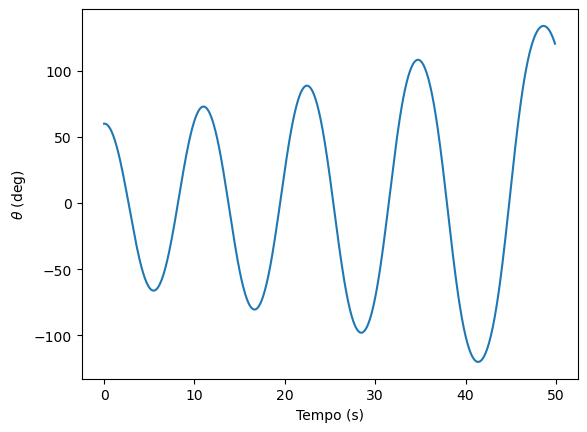

In [40]:
# Fazemos o plot do movimento
plt.plot(t, theta*180/np.pi)
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\theta$ (deg)')

**Note que o movimento começou em 60º com velocidade angular zero, mas o ângulo aumentou, sendo fisicamente errado. Isso se deve principalmente ao intervalo grande entre os pontos. Se diminuirmos o passo a integração fica muito melhor:**

Text(0, 0.5, '$\\theta$ (deg)')

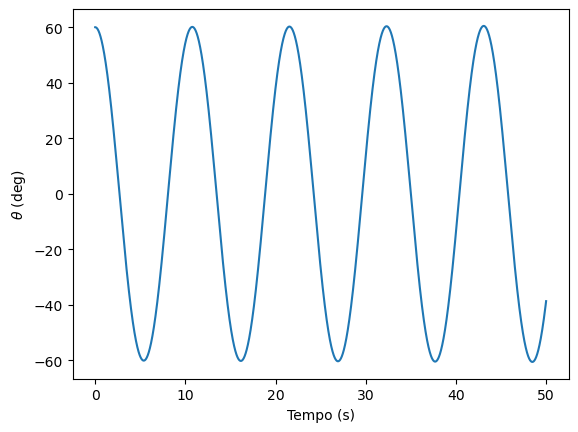

In [41]:
n = 50000  # Número de passos da integração
dt = T/n  # Calcula o passo da integração
t = np.arange(0, T, dt)
theta, omega = euler_method(theta0, w0, dt, n)
plt.plot(t, theta*180/np.pi)
plt.xlabel('Tempo (s)')
plt.ylabel(r'$\theta$ (deg)')

## Erro da integração

Acima vimos dois exemplos, com o mesmo intervalo total, mesma função, mas com passos diferentes entre dois pontos. É notável que há um erro numérico que é propagado nesta integração. No segundo exemplo, não é possível notar nenhum erro visual. Como podemos determinar o erro real causado pela integração?

A série de Taylor é um método de aproximar uma função $f(x)$ que está próximo de $x=a$ onde se conhece o valor de $a$ e todas as suas derivadas. Neste caso, temos que:

\begin{equation}
f(x) = f(a) + \frac{f'(a)}{1!}(x-a) + \frac{f''(a)}{2!} + O(3)
\tag{6}
\end{equation}

onde $O(3)$ representa o termo de ordem 3 da série de Taylor e posteriores. Se comparamos a série de Taylor com a equação (3) temos que o que falta para o método de Euler ser igual à série de Taylor são os termos de ordem (2) e posteriores. Como a série de Taylor é uma série que converge para a função real naquele ponto, essa diferença é igual ao erro local do método de Euler.

\begin{equation}
\epsilon_{n+1} = \frac{h^2}{2}f''(t_n) + O(3)
\tag{7}
\end{equation}

Aplicando ao problema do pêndulo temos:

\begin{equation}
\epsilon_{n+1} = \frac{h^2}{2}\frac{d^2\theta}{dt^2}
\tag{8}
\end{equation}
onde omitimos o termo de terceira ordem pois apenas a segunda ordem nos dará uma boa estimativa do erro.

In [44]:
erro = np.zeros(n)
erro[0] = 0
for i in range(1, n):
    erro[i] = np.absolute((dt**2)*(-(g/L)*np.sin(theta[i-1]))/2)

In [45]:
erro

array([0.00000000e+00, 1.69914184e-07, 1.69914184e-07, ...,
       1.22743123e-07, 1.22670289e-07, 1.22597389e-07])

## Energia do movimento

O erro calculado acima nos dá uma noção do erro numérico de cada passo individual. Porém, podemos utilizar a própria física para estimar o erro total da integração.

O problema do pêndulo é um movimento ditado apenas pela gravidade. Como a gravidade é uma força conservativa, a energia mecânica deve ser conservada. Ou seja, a energia mecânica não deve variar ao longo de todo o problema.

A energia mecânica é definida como a soma da energia cinética com a energia potencial: $E_{mec} = K + U$.

A energia cinética é dada pela equação $K = \frac{1}{2}mv^2$, onde $v=\omega L$ para o movimento do pêndulo.

A energia potencial é dada pela equação $U = mgL(1-\cos(\theta))$ para o pêndulo.

In [49]:
K = (m*(L*omega)**2)/2
U = m*g*L*(1-np.cos(theta))
E = K + U

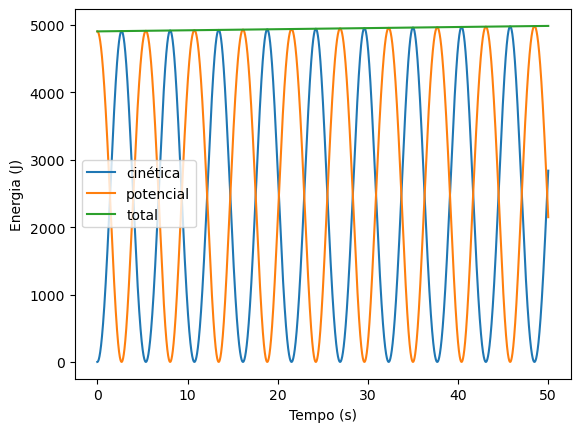

In [50]:
plt.plot(t, K, label='cinética')
plt.plot(t, U, label='potencial')
plt.plot(t, E, label='total')
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')
plt.legend()

Text(0, 0.5, 'Energia (J)')

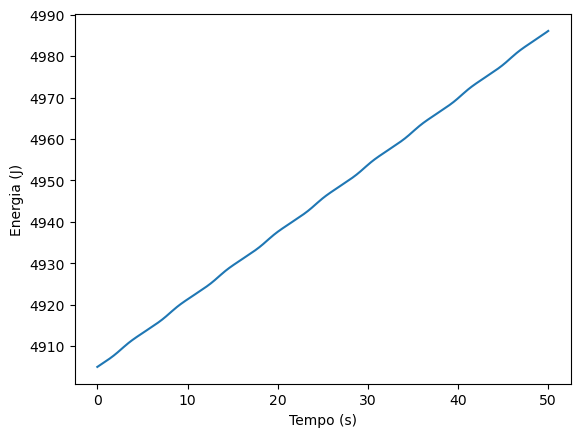

In [52]:
# Se olharmos apenas a energia mecânica vemos que ela cresce um pouco ao longo do tempo invés de ser constante como deveria ser
plt.plot(t, E)
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')

In [53]:
# Podemos calcular o quanto a energia cresce
print((E[-1]-E[0])/E[0])

0.016532125619373197
